# Practical Aspects of Image Classification

- **Topics will be covered in this chapter:**
    - Generating class activation maps (CAMs).
    - Understanding the impact of batch normalization and data augmentation
    - Practical aspects to take care of during model implementation

---
# Generating CAMs

###### This process helps to visualize and understand which parts of an image are particularly important for a neural network when identifying a specific class. The method uses gradients to highlight the relevant features in the intermediate activation maps.


- **Scenario**: Stakeholder wants to understand the reasoning behind a model's predictions.

- **Solution**: Class Activation Maps (CAMs) provide insight into model predictions.

- CAMs help interpret model decisions and provide transparency in prediction rationale.

Summary of CAM Generation:

- **Feature Maps:**
  - Intermediate activations post-convolution.
  - Typically in the shape of n-channels x height x width.

- **Identifying Hotspots:**
  - Mean of all activations reveals hotspots for all classes.

- **Class-specific Hotspots:**
  - To pinpoint locations crucial for a specific class (e.g., cat).
  - Identify feature maps among n-channels responsible for that class.

- **Gradient Computation:**
  - Compute gradients for the convolution layer corresponding to the cat class.
  - High gradients only in channels responsible for predicting cats.

- **Weightage Assignment:**
  - Utilize gradient information to assign weightage to each of n-channels.
  - Obtain an activation map exclusively highlighting areas relevant to the cat class.

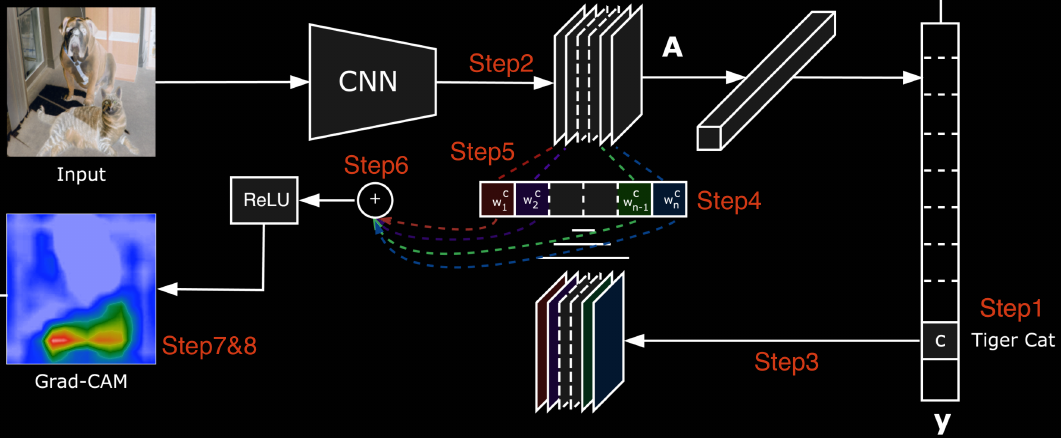

1. **Class and Layer Selection:**
   - Choose the target class and the convolutional layer for CAM computation.

2. **Activation Calculation:**
   - Calculate activations from the chosen convolutional layer.
   - Example: Feature shape is 512 x 7 x 7.

3. **Gradient Retrieval:**
   - Fetch gradient values from this layer concerning the class of interest.
   - Output shape: 256 x 512 x 3 x 3.

4. **Gradient Mean Calculation:**
   - Compute the mean of gradients within each output channel.
   - Output shape: 512.

5. **Weighted Activation Map:**
   - Multiply the 512 gradient means by the 512 activation channels.
   - Output shape: 512 x 7 x 7.

6. **Mean Across Channels:**
   - Calculate the mean across the 512 channels for a 7 x 7 output.

7. **Resize Activation Map:**
   - Upscale the weighted activation map to match the input image size.

8. **Overlay onto Input Image:**
   - Overlay the resized activation map onto the original input image.

The key to the entire process lies in step 5. We consider two aspects of the step:
- If a certain pixel is important, then the CNN will have a large activation at those pixels.
- If a certain convolutional channel is important with respect to the required class, the gradients at that channel will be very large